# FordGoBike DataSet
## (Jan  2018 - Dec 2018)

In [1]:
from IPython.display import Image
img = "https://images.ctfassets.net/q8mvene1wzq4/4nRp3KxeJFxEhiYUjsKHZm/65c7e155fc0b6494d6bd4205af1f987b/Watson_bike.jpg"
Image( url =img) 

<a id='intro'></a>
## **Introduction**

> Ford GoBike is the Bay Area's bike share system. Bay Area Bike Share was introduced in 2013 as a pilot program for the region, with 700 bikes and 70 stations across San Francisco and San Jose. Once expansion is complete, Ford GoBike will grow to 7,000 bikes across San Francisco, the East Bay and San Jose.

> Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. People use bike share to commute to work or school, run errands, get to appointments or social engagements and more. It's a fun, convenient and affordable way to get around.

>The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

> See the data [here](https://www.fordgobike.com/system-data)

------------------
<br>

### **Questions**
- When is the service often used? (weekdays vs. weekends)

- Which Month seem to be the most popular Month for using the bike sharing system,

- What time of the day do users use this service?

- Average Duration of ride    

- Average Distance Travel


##### What are the characteristics of Customers vs. Subscribers?

- Who's contribution is high the Customer are the Subscriber

- Who travel more is customers are subscribers

- Customer vs Subscriber ride duration 

- Customer vs Subscriber Usage of bike system

--------------
<br>

### **Data Gathering** <br>
Ford GoBike is a publicly available dataset that will enable different folks with different skillsets to play around with.<br>
Data is downloaded from https://s3.amazonaws.com/baywheels-data/index.html<br>

There are 12 CSVs provided and the same is downloaded<br>

For the current analysis, 2018 data is downloaded<br>
Brief description about the data Each trip is anonymized and includes:<br>
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer — “Subscriber” = Member or “Customer” = Casual)<br>

------
<br>

### **Data Wrangling:** <br>
- All datasets are downloaded programatically and appended<br>
- Upon a detailed review of the data, I was able to identify the below quality issues<br>
- Update start_time and end_time to date-time format<br>
- Convert the start_station_id and end_station_id int int64<br>


In [2]:
# Importing Libraries
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

no_color = sns.color_palette()[0]

#### Merging all month dataset and creating a master dataset 
#### Gathering all month data set for the year of 2018 and stored in a folder to merge all individual dataset into One

In [3]:
# path = 'C:/Users/Chainsys/1Data_Science/Communicate-Data-Findings/ford_data/'
# all_files = glob.glob(os.path.join(path, "*.csv")) 
# df_from_each_file = (pd.read_csv(f) for f in all_files)
# concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
# concatenated_df.to_csv('ford2018.csv',index=False)

In [4]:
df_org = pd.read_csv('ford2018.csv')

In [5]:
df_org.index.names = ['index']

In [6]:
df_org.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

In [7]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 14 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
dtypes: float64(6), int64(2), object(6)
memory usage: 199.1+ MB


In [8]:
df_org.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03


In [9]:
# Save the original data set , cleaned version while I clean things up
df = df_org.copy()

----------------
<br>

### **Data Preparation** <br>
Based on the business questions listed above, and identified quality gaps below are some updates needed
- Defining the day of the week
- Extracting time information form the start and end time columns
- Defining the distance using Orgin and Destination using Latitude & Longitude information as Kilometer and Miles
- New Hours Column driven from duration_sec column
- Defining new column as start_date & end_date Column which was driven from start_time & end_time
- Creating a time of the day variable


In [10]:
# Changing datatype of time from object to timestamp
df['start_time'] = pd.to_datetime(df["start_time"]) 
df['end_time'] = pd.to_datetime(df["end_time"]) 

In [11]:
# Changing datatype of start_station_id, end_station_id to numeric
df[['start_station_id', 'end_station_id']] = df[['start_station_id', 'end_station_id']].apply(pd.to_numeric) 

In [12]:
# KM Distance Column Created using orgin and distanation
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371
    # this is in kilometers - will convert to US units of miles after

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d
df['distance_km'] = df.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [13]:
# Miles Distance Column Created using Distance KM column
df['distance_miles'] = df['distance_km'] * 0.621371

In [14]:
# Seconds to hours conversion
df['travel_hours'] = df.apply(lambda row: row.duration_sec/3600, axis = 1) 

In [15]:
# Start time month  (1-12)
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_time_month'] = df['start_time'].dt.strftime('%B')

In [16]:
# Start time month Number (1-12)
df['start_time_month_num'] = df['start_time'].dt.month.astype(int)

In [17]:
# Start time weekday
df['start_time_weekday'] = df['start_time'].dt.strftime('%a')

In [18]:
# Duration in seconds to duration in minutes
df['duration_min'] = df['duration_sec']/60
df['duration_min'] = df['duration_min'].astype(int)

In [19]:
# Start and end time hour
df['start_time_hour'] = df['start_time'].dt.hour
df['end_time_hour'] = df['end_time'].dt.hour

In [20]:
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,distance_km,distance_miles,travel_hours,start_time_month,start_time_month_num,start_time_weekday,duration_min,start_time_hour,end_time_hour
index,,,,,,,,,,,,,,,,,,,,,
500813,620,2018-05-22 07:56:44.141,2018-05-22 08:07:04.880,58.0,Market St at 10th St,37.776619,-122.417385,101.0,San Bruno Ave at 16th St,37.766008,...,No,1.565643,0.972845,0.172222,May,5,Tue,10,7,8
199116,586,2018-02-01 14:17:17.098,2018-02-01 14:27:04.038,243.0,Bancroft Way at College Ave,37.869360,-122.254337,170.0,Telegraph Ave at 58th St,37.844493,...,No,2.832879,1.760269,0.162778,February,2,Thu,9,14,14
1244464,1990,2018-09-25 17:16:51.727,2018-09-25 17:50:02.416,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,262.0,West St at University Ave,37.869967,...,No,6.558316,4.075147,0.552778,September,9,Tue,33,17,17
766476,1316,2018-06-08 21:31:37.019,2018-06-08 21:53:33.231,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,6.0,The Embarcadero at Sansome St,37.804770,...,No,2.366346,1.470379,0.365556,June,6,Fri,21,21,21
18248,482,2018-01-26 23:05:19.159,2018-01-26 23:13:22.116,76.0,McCoppin St at Valencia St,37.771662,-122.422423,72.0,Page St at Scott St,37.772406,...,Yes,1.165480,0.724196,0.133889,January,1,Fri,8,23,23


In [21]:
#### There is no use of ['start_station_latitude', 'start_station_latitude', 'end_station_latitude', 'end_station_longitude','duration_sec'] this columns so we drop it
# df = df.drop(['start_station_latitude','start_station_longitude', 'start_station_latitude', 'end_station_latitude', 'end_station_longitude','duration_sec'], axis = 1) 

In [22]:
df.isna().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
distance_km                    0
distance_miles                 0
travel_hours                   0
start_time_month               0
start_time_month_num           0
start_time_weekday             0
duration_min                   0
start_time_hour                0
end_time_hour                  0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 23 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
bike_share_for_all_trip    object
distance_km                float64
distance_miles             float64
travel_hours               float64
start_time_month           object
start_time_month_num       int32
start_time_weekday         object
duration_min               int32
start_time_hour            int64
end_time_hour              int64
dtypes: datetime64[ns](2), float64(9), int32(2), int64(4), object(6)
memory usage: 312

In [24]:
df.to_csv('master_ford_dataset.csv',index=False)

In [25]:
df_m = pd.read_csv('master_ford_dataset.csv')

In [26]:
df = df_m.copy()

<br>

--------------------

<br>

### Structure of your dataset?

> The FordGoBike data is straightforward and easy to understand. This data has been collected efficiently, providing a valuable collection of data to work with and draw conclusions from.

> The column header descriptions are as follows (each trip is anonymized):
- Trip Duration (seconds)
    - Start Time and Date
    - End Time and Date
- Start Station ID
    - Start Station Name
    - Start Station Latitude
    - Start Station Longitude
- End Station ID
    - End Station Name
    - End Station Latitude
    - End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
    - Member Year of Birth
    - Member Gender
    
> I added the following columns in my cleaning efforts:
- Start Time Month	
- Start Time Month Number	
- Start Time Day of the Week	
- Start Time Hour
- Distance (km)
- Distance (miles)
- Travel_hours 

### What is/are the main feature(s) of interest in your dataset?

> The main features include data related to the start and end of a ride. This can be used to calculate when bikes are in high or low demand.These features can be used to make business decisions such as which age group to target in marketing campaigns, or which day of the week bikes should be most available. 

------------------
<br>

## Univariate Exploration

> In this section, I investigate distributions of individual variables. This is also in preparation to look at the relationships between variables.

<br>

### Question 1:
#### When is the service often used? (weekdays vs. weekends) ?

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


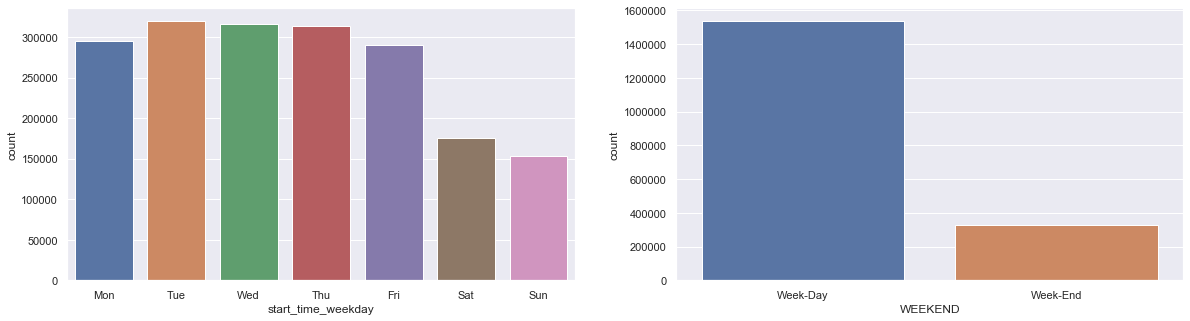

In [27]:
df['WEEKEND'] = ((pd.DatetimeIndex(df['start_time']).dayofweek) // 5 == 1).astype(float)
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

df['WEEKEND'] = df['WEEKEND'].map({0.0: 'Week-Day', 1.0: 'Week-End'})

sns.set(style="darkgrid")
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.countplot(df['start_time_weekday'], ax=ax[0],order = weekday)
sns.countplot(df['WEEKEND'], ax=ax[1])
fig.show()

##### Observed :
##### Tuesdays and Wednesdays seem to be the most popular days for using the bike sharing system. The usage drops significantly on Saturdays and Sundays suggesting the Ford bike share system is used primarily for commuting purposes during working days.
<br>

----------

<br>

### Question 2:
#### Which Month seem to be the most popular Month for using the bike sharing system ?

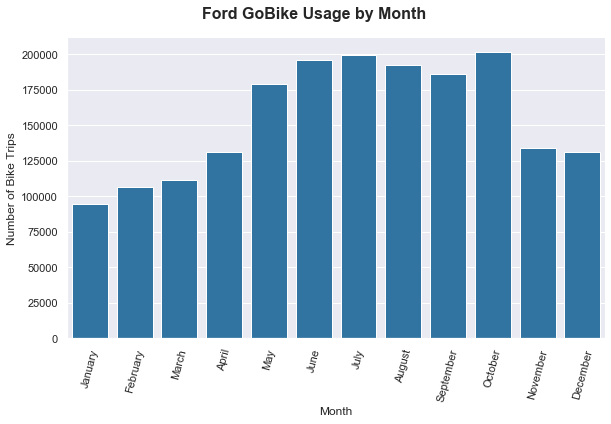

In [28]:
# Monthly usage of the Ford Go Bike system
graph = sns.catplot(data = df, x = 'start_time_month', kind = 'count', color = no_color, aspect = 1.7);

graph.set_axis_labels('Month', 'Number of Bike Trips'),

graph.fig.suptitle('Ford GoBike Usage by Month', y = 1.05, fontsize = 16, fontweight = 'bold');

graph.set_xticklabels(rotation=75);

##### Observed :
##### Not surprisingly, the summer months and early-mid autumn are the most popular times to use the Ford Go Bike sharing system. October is the most popular month, with July as the second most popular, and June/August coming in closely as the third most popular months to use the bike system
<br>



----------

<br>

### Question 3:
#### What time of the day do users use this service?

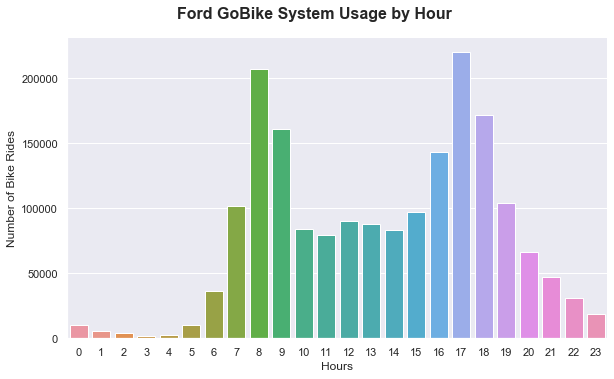

In [29]:
# Hourly usage of the Ford Go Bike System
graph = sns.catplot(data = df, x='start_time_hour', kind='count', aspect = 1.7)

graph.set_axis_labels('Hours', 'Number of Bike Rides')

graph.fig.suptitle('Ford GoBike System Usage by Hour', y=1.05, fontsize=16, fontweight='bold');

##### Observed :
##### Most usage of bike is during the morning hours of 8-9am, and in the afternoon hours of 5-6pm, which is a typical workday .

----------

<br>

### Question 4:
#### Average Duration of ride    ?


In [30]:
df.duration_min.describe()

count    1.863721e+06
mean     1.379682e+01
std      3.950700e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.439000e+03
Name: duration_min, dtype: float64

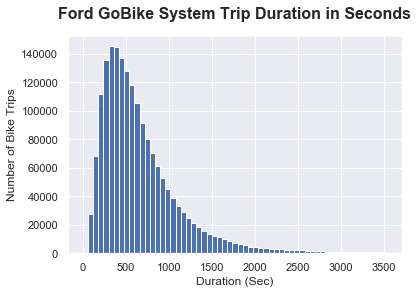

In [31]:
# Duration of the bike rides - in SECONDS
bin_edges = np.arange(0, 3600, 60)

plt.hist(data = df, x = 'duration_sec', bins = bin_edges);

plt.title("Ford GoBike System Trip Duration in Seconds", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of Bike Trips');

In [32]:
df.duration_min.describe(percentiles = [.95])
df.duration_min.describe()

count    1.863721e+06
mean     1.379682e+01
std      3.950700e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.439000e+03
Name: duration_min, dtype: float64

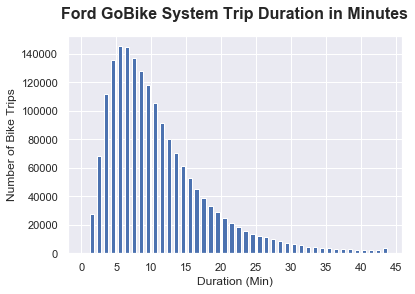

In [33]:
# Duration of the bike rides -in MINUTES
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df, x = 'duration_min', bins = bin_edges, rwidth = 0.6);

plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

----------

<br>

### Question 4:
#### Average Distance Travel ?


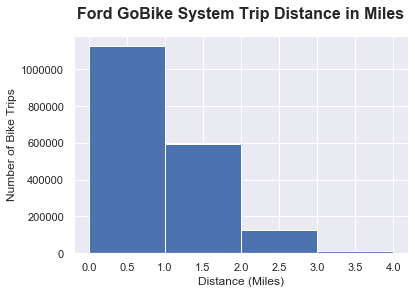

In [34]:
# Distance in miles traveled
bin_edges = np.arange(0, 5, 1)

plt.hist(data = df, x = 'distance_miles', bins = bin_edges);

plt.title("Ford GoBike System Trip Distance in Miles", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Distance (Miles)')
plt.ylabel('Number of Bike Trips');

<br>

-------------

## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in the data.


<br>

### What are the characteristics of Customers vs. Subscribers?

<br>

### Question 5:
#### Who's contribution is high the Customer are the Subscriber ?


In [35]:
# Customers vs Subscribers
customer = df.query('user_type == "Customer"')['bike_id'].count()
subscriber = df.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df['bike_id'].count()
subscriber_prop = subscriber / df['bike_id'].count()

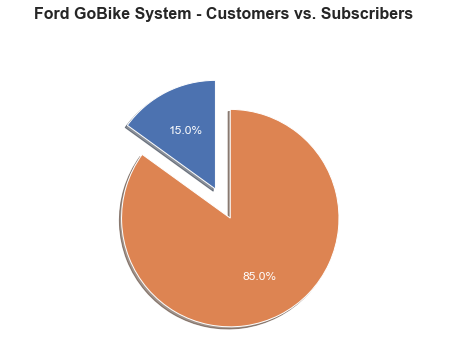

In [36]:
# Customers vs Subscribers Visuals
# pie chart
plt.figure(figsize = [8, 5])

labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.3)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'white'})
plt.axis('equal')

plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

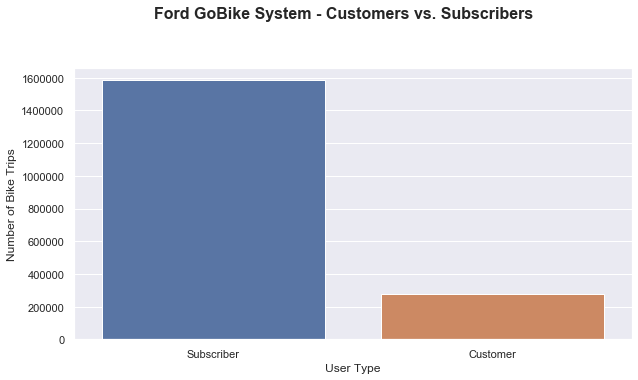

In [37]:
# Customers vs Subscribers Visuals
# bar chart
plt.figure(figsize = [10, 5])

graph = sns.countplot(data = df, x = "user_type", order = df.user_type.value_counts().index);
graph.set_xlabel('User Type');
graph.set_ylabel('Number of Bike Trips');
plt.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');


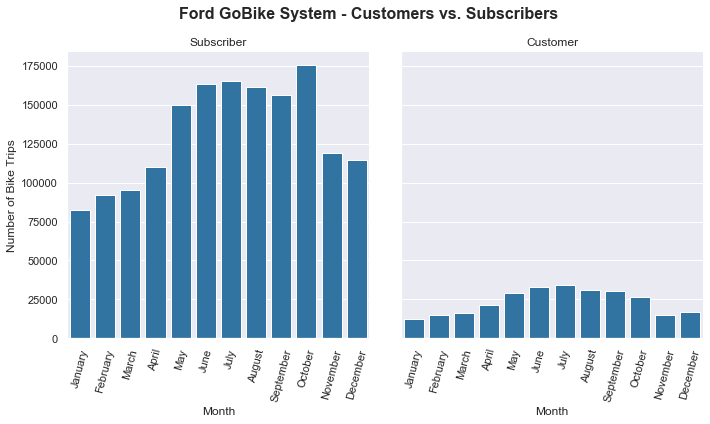

In [38]:
# Customer Usage by Month vs. Subscriber Usage by Month
#plt.figure(figsize = [12, 5])
graph = sns.catplot(data=df, x='start_time_month', col="user_type", kind='count', sharey = True, color = no_color);

graph.set_axis_labels("Month", "Number of Bike Trips");
graph.set_titles("{col_name}");

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

##### Observed : 
##### Winter months are the worst for the bike sharing system for both groups what can be determined by the harsher weather. 
##### Customers: demand is high around summertime, reaching its peak in July.  
##### Subscribers: the highest demand is from May till October, reaching it's peak in October.

-------------------

<br>

### Question 6:
#### Who travel more is customers are subscribers ?



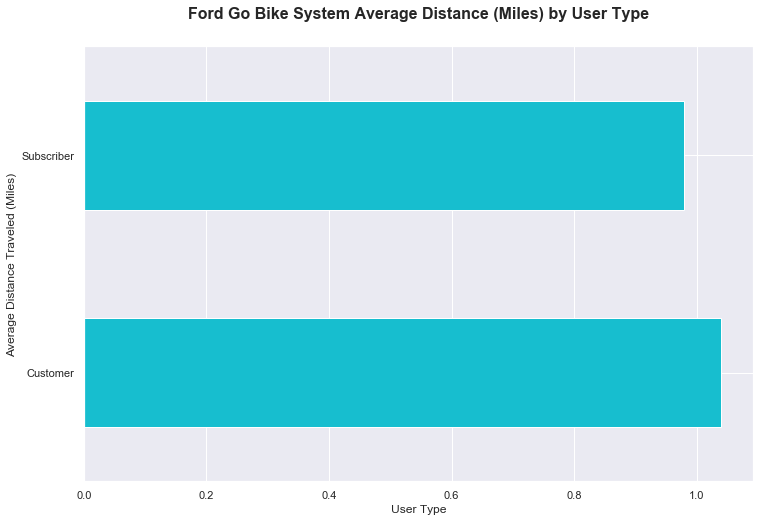

In [39]:
# Customer Usage by Distance vs. Subscriber Usage by Distance
plt = df.groupby('user_type')['distance_miles'].mean().plot(kind='barh', figsize=(12,8),color='#17becf');

plt.set_title('Ford Go Bike System Average Distance (Miles) by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.set_xlabel('User Type')
plt.set_ylabel('Average Distance Traveled (Miles)');

##### Observed :
##### The average distance traveled by customers is slightly higher than subscribers. The commuting distance for the subscribers is less than the average ride a customer takes. 

-------------------

<br>

### Question 7:
#### Customer vs Subscriber ride duration ?




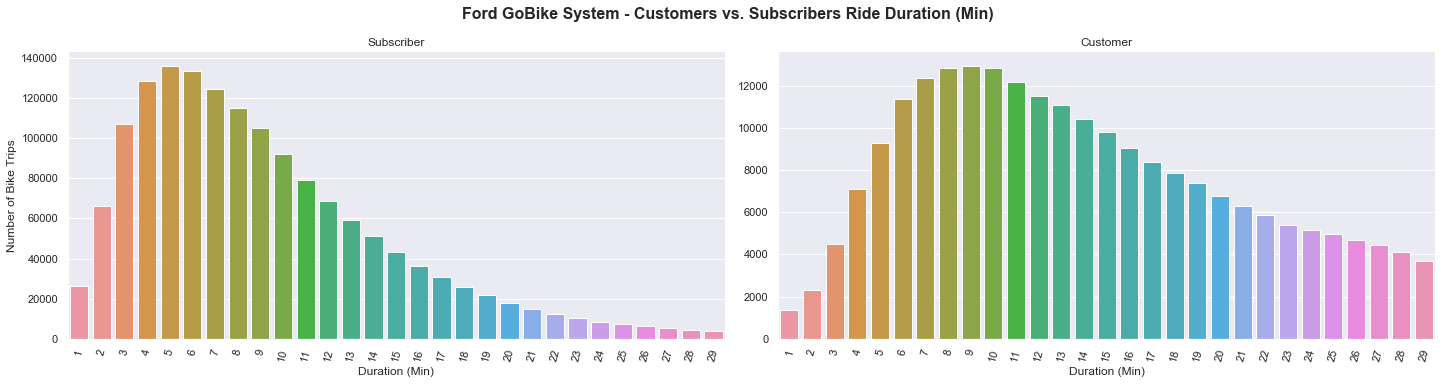

In [40]:
# Customer Usage by Duration vs. Subscriber Usage by Duration

data = df.query('duration_min < 30')

graph = sns.catplot(data=data, x = 'duration_min', col='user_type', kind='count', sharey = False, height=5, aspect=2);

graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Ride Duration (Min)', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

-------------------

<br>

### Question 8:
#### Customer vs Subscriber Usage of bike system ?




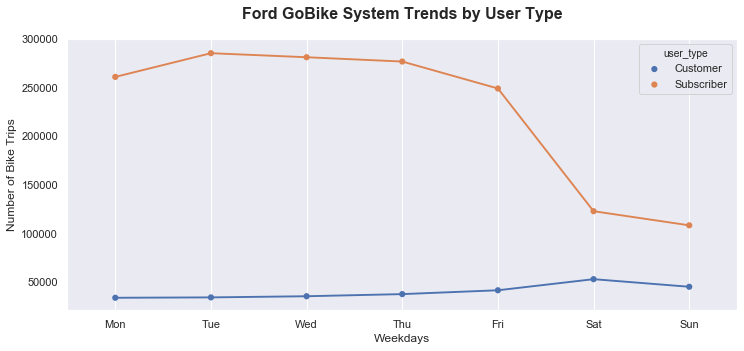

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Customer Usage by Weekday vs. Subscriber Usage by Weekday
plt.figure(figsize=(12, 5))

df_cleaned_user_week = df.groupby(['start_time_weekday', 'user_type']).size().reset_index()
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax = sns.pointplot(data=df_cleaned_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.title('Ford GoBike System Trends by User Type', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()

##### Observed :
##### The point plot above is an excellent visual showing the sharp contrast between Customers and Subscribers. Customers have a relatively low usage of the bike share system with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend.


## Conclusion
>Tuesdays and Wednesdays seem to be the most popular days for using the bike sharing system.
The usage drops significantly on Saturdays and Sundays
<br>

>The summer months and early-mid autumn are the most popular times to use the Ford Go Bike sharing system. 
October is the most popular month, with July as the second most popular, and June/August coming in closely as the third most popular months to use the bike system
<br>


>Most usage of bike is during the morning hours of 8-9am, and in the afternoon hours of 5-6pm, which is a typical workday .
<br>

>Winter months are the worst for the bike sharing system 
Customers: demand is high around summertime, reaching its peak in July.  
Subscribers: the highest demand is from May till October, reaching it's peak in October.
<br>

>The average distance traveled by customers is slightly higher than subscribers. The commuting distance for the subscribers is less than the average ride a customer takes. 
<br>

>relatively low usage of the bike share system with a small increase on the weekends. Subscribers are the opposite - there is steadily high usage on weekdays, with a sharp decline on the weekend.

## Summary

Ford GoBike System is one of the best program which help users physics and environment friendly
>Apart from dataset
Environmentally friendly, budget friendly, and lifetsyle friendly. <br>
Subscribers (i.e. daily commuters) benefit from a health commuting choice <br>
Customers (i.e. tourists, students, etc.) have a sustainable, yet flexible option for touring the city.<br>
Affordable and convenient transportation for the people of all socioeconomic classes<br>


> There are two types of clients using the system: Subscribers and Customers. <br>
    Subscribers are primarily daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm <br>
    Customers are usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area.

## Source & Reference

- [FordGoBike Data Set](https://www.fordgobike.com/)
- [Seaborn catplot](https://seaborn.pydata.org/generated/seaborn.catplot.html) documentation
- [Matplotlib histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) documentation
- [IPython Display](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html) documentation
